In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("../Resource/Group Project-3/SY2018_2019.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INSTNM          2420 non-null   object 
 1   STABBR          2420 non-null   object 
 2   CITY            2420 non-null   object 
 3   LATITUDE        2420 non-null   float64
 4   LONGITUDE       2420 non-null   float64
 5   SCHTYPE         2420 non-null   float64
 6   C100_4          2420 non-null   float64
 7   TRANS_4         2420 non-null   float64
 8   SAT_AVG         2420 non-null   float64
 9   ACTCMMID        2420 non-null   float64
 10  UGDS            2420 non-null   float64
 11  UGDS_WOMEN      2420 non-null   float64
 12  UGDS_MEN        2420 non-null   float64
 13  UGDS_WHITE      2420 non-null   float64
 14  UGDS_BLACK      2420 non-null   float64
 15  UGDS_HISP       2420 non-null   float64
 16  UGDS_ASIAN      2420 non-null   float64
 17  UGDS_AIAN       2420 non-null   f

In [3]:
data_sc= data[["INSTNM","SAT_AVG","ACTCMMID","COSTT4_A","TUITIONFEE_OUT","TRANS_4","C100_4","SCHTYPE","UGDS_WHITE","UGDS_BLACK","UGDS_HISP","UGDS_WOMEN"]]


data_sc=data_sc.rename(columns={"SAT_AVG":"Average SAT","ACTCMMID":"ACT","COSTT4_A":"Average cost","TUITIONFEE_OUT":"Out-of-state tuition ","C100_4":"Completion Rate","SCHTYPE":"Private","UGDS_WOMEN":"Number of Wome","TRANS_4":"Trans Rate"})


In [4]:
data_sc.describe()

,Average SAT,ACT,Average cost,Out-of-state tuition,Trans Rate,Completion Rate,Private,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,Number of Wome
count,2420.00000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000
mean,1141.36157,23.614876,36731.098760,28781.963223,0.136532,0.418761,1.616529,0.591160,0.128761,0.109327,0.562352
std,126.61318,3.662885,15379.579562,11464.788302,0.153025,0.206750,0.493085,0.211447,0.172087,0.114070,0.123886
min,564.00000,11.000000,6646.000000,1020.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1056.75000,21.000000,23104.500000,19649.250000,0.000000,0.256175,1.000000,0.487250,0.041500,0.041600,0.505200
50%,1123.00000,23.000000,35304.000000,27604.000000,0.063950,0.396900,2.000000,0.636950,0.073800,0.072450,0.561050
75%,1200.00000,25.000000,47190.250000,35801.000000,0.271700,0.564750,2.000000,0.748325,0.139425,0.128150,0.614750
max,1566.00000,36.000000,75735.000000,59430.000000,0.750500,1.000000,3.000000,0.942500,0.978200,0.950600,1.000000


In [5]:
data_sc=data_sc.set_index(data_sc.columns[0])

In [6]:
data_sc.head()

,Average SAT,ACT,Average cost,Out-of-state tuition,Trans Rate,Completion Rate,Private,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,Number of Wome
INSTNM,,,,,,,,,,,
Alabama A & M University,957.0,18.0,22489.0,18354.0,0.4206,0.0556,1.0,0.0186,0.9120,0.0088,0.5924
University of Alabama at Birmingham,1220.0,25.0,24347.0,19704.0,0.2234,0.3462,1.0,0.5717,0.2553,0.0334,0.6070
University of Alabama in Huntsville,1314.0,28.0,23441.0,22362.0,0.2959,0.2195,1.0,0.7167,0.0969,0.0528,0.4204
Alabama State University,972.0,18.0,21476.0,19396.0,0.3691,0.0975,1.0,0.0167,0.9352,0.0095,0.6290
The University of Alabama,1252.0,27.0,29424.0,29230.0,0.1877,0.5049,1.0,0.7774,0.0999,0.0499,0.5557


In [7]:
X = data_sc.drop("Completion Rate",axis=1)
y = data_sc["Completion Rate"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Scale the data

In [9]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train)

model.coef_
print(f"coefficient: {model.coef_}")


coefficient: [ 0.01889205  0.07906869  0.05742177  0.03626976 -0.01154549  0.00461055
  0.04907639  0.0217414   0.01612768  0.01578851]


In [11]:
feature_names=list(data_sc.columns)
sorted(zip(model.coef_, feature_names), reverse=True)

[(0.07906869007595921, 'ACT'),
 (0.057421771556865606, 'Average cost'),
 (0.04907638985937013, 'Private'),
 (0.03626976307466995, 'Out-of-state tuition '),
 (0.021741400483048158, 'UGDS_WHITE'),
 (0.018892054846023056, 'Average SAT'),
 (0.016127684574564937, 'UGDS_BLACK'),
 (0.015788512422707054, 'UGDS_HISP'),
 (0.004610554999006876, 'Completion Rate'),
 (-0.01154549288929923, 'Trans Rate')]

In [12]:
score = model.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.7499846859602861


# Ridge regression
#It is implemented for analyzing numerous regression data. When multicollinearity occurs, least-square calculations get unbiased

In [13]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
coef_ridge = ridge.coef_
print(f"coefficient: {coef_ridge}")

coefficient: [ 0.01958027  0.07830532  0.05725234  0.03638141 -0.01154645  0.00467624
  0.04885899  0.0215416   0.01597605  0.01578272]


In [14]:
sorted(zip(coef_ridge, feature_names), reverse=True)

[(0.07830532329204387, 'ACT'),
 (0.057252341319843164, 'Average cost'),
 (0.048858989039002515, 'Private'),
 (0.036381412121722995, 'Out-of-state tuition '),
 (0.021541595870538038, 'UGDS_WHITE'),
 (0.019580268454132566, 'Average SAT'),
 (0.015976052846060487, 'UGDS_BLACK'),
 (0.015782719988945152, 'UGDS_HISP'),
 (0.004676240363912709, 'Completion Rate'),
 (-0.011546452545525047, 'Trans Rate')]

In [15]:
score = ridge.score(X_test_scaled, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.750034991287285


In [16]:
# x = np.linspace(X.min(), X.max(), 10)

# coef_ = ridge.coef_ * x + ridge.intercept_
# plt.plot(x, coef_, 'g-', label="ridge regression")

# Gradient Boosting Regression

In [17]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [18]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [19]:
reg = ensemble.GradientBoostingRegressor(**params)

In [20]:
reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
mse = mean_squared_error(y_test, reg.predict(X_test_scaled))
print(f'The mean squared error (MSE) on test set: {mse}')

The mean squared error (MSE) on test set: 0.008615966614567268


In [22]:
reg.score(X_test_scaled,y_test)
print(f"R2 Score: {score}")

R2 Score: 0.750034991287285


In [23]:
gbs_feature_importance=reg.feature_importances_

In [24]:
feature_names=X.columns

Text(0.5, 1.0, 'Gradient Boosting Regression Feature Importance (MDI)')

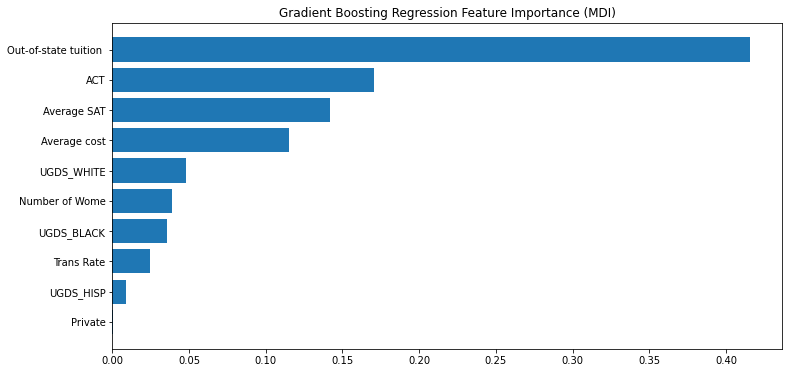

In [25]:
gbs_sorted_idx = np.argsort(gbs_feature_importance)
pos = np.arange(gbs_sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, gbs_feature_importance[gbs_sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[gbs_sorted_idx])
plt.title('Gradient Boosting Regression Feature Importance (MDI)')

# Pipeline

In [ ]:
data.head().T

In [ ]:
X_ = data.drop(columns=["C100_4"],axis=1)
y_ = data["C100_4"]

In [ ]:
names = X_.columns.to_list()

In [ ]:
cat_col = X_.select_dtypes(include="object").columns.to_list()
num_col = X_.select_dtypes(exclude="object").columns.to_list()
cat_col,num_col

In [ ]:
X__train, X__test, y__train, y__test = train_test_split(X_, y_, train_size=.9, random_state=42)
len(X__train)

In [ ]:
params = {'n_estimators': 10000,
          'max_depth': 6,
          'min_samples_split': 5,
          'learning_rate': 0.001,
          'loss': 'ls'}

In [ ]:
model = ensemble.GradientBoostingRegressor(**params)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [ ]:
num_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("Scaler",MinMaxScaler())
])

In [ ]:
cat_pipe = Pipeline([
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("one_hot",OneHotEncoder(handle_unknown="ignore"))
])

In [ ]:
pre_processing = ColumnTransformer([
    ("cat",cat_pipe,cat_col),
    ("num",num_pipe,num_col)
])

In [ ]:
pipe_model = Pipeline([
    ("processing",pre_processing),
    ("feature_selection",SelectFromModel(model)),
    ("Regressor",model)
])

In [ ]:
param_grid = {'Regressor__n_estimators':[ 500,1000,10000],
              'Regressor__max_depth': [4,6,8],
              'Regressor__min_samples_split': [3,5,7],
              'Regressor__learning_rate': [.1,.001],
              'Regressor__loss': ['ls', 'lad', 'huber', 'quantile']}

In [ ]:
search = GridSearchCV(pipe_model, param_grid, n_jobs=4,verbose=2)

In [ ]:
--search.fit(X__train,y__train)

In [ ]:
search.best_params_

In [ ]:
search.score(X__train,y__train),pipe_model.score(X__test,y__test)

In [ ]:
pipe_model.fit(X__train,y__train)

In [ ]:
pipe_model.score(X__train,y__train),pipe_model.score(X__test,y__test)